## DataFrame 데이터 프레임 

- 2차원 배열로 생각하기
- 넘파이의 2차열 배열과 따로 생각하기.
- 표, 테이블 형태

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({
    '연차' : [1, 2, 3],
    '연도' : [2015, 2016, 2017],
    '매출' : [10000, 20000, 30000]
})
df

,연차,연도,매출
0,1,2015,10000
1,2,2016,20000
2,3,2017,30000


In [3]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [4]:
# index를 '연도' 열으로 지정한다.
df.set_index('연도', inplace = True)
df.index

Int64Index([2015, 2016, 2017], dtype='int64', name='연도')

In [5]:
df

,연차,매출
연도,,
2015,1,10000
2016,2,20000
2017,3,30000


### DataFrame의 Column(컬럼, 열)

In [6]:
df = pd.DataFrame({
    '연차' : [1, 2, 3],
    '연도' : [2015, 2016, 2017],
    '매출' : [10000, 20000, 30000]
})
df

,연차,연도,매출
0,1,2015,10000
1,2,2016,20000
2,3,2017,30000


In [7]:
# 매출 열 출력한다.
df['매출']

0    10000
1    20000
2    30000
Name: 매출, dtype: int64

In [8]:
# df안에 모든 column들이 있는지 확인한다.
df.columns

Index(['연차', '연도', '매출'], dtype='object')

### DataFrame의 Data 조회하기

In [10]:
df = pd.DataFrame({
    '연차' : [1, 2, 3],
    '연도' : [2015, 2016, 2017],
    '매출' : [10000, 20000, 30000]
})
df

,연차,연도,매출
0,1,2015,10000
1,2,2016,20000
2,3,2017,30000


In [15]:
df.set_index('연도', inplace = True) # 인덱스를 연도로 지정하였습니다.

In [16]:
# 행 현재 인덱스는 연도입니다. 해당 레이블의 행값을 가져온다.
df.loc[2016]

연차        2
매출    20000
Name: 2016, dtype: int64

In [17]:
# 슬라이싱도 가능합니다.
df.loc[2015:2017]

,연차,매출
연도,,
2015,1,10000
2016,2,20000
2017,3,30000


In [18]:
# 2016년도에 매출이 보고싶을때, 
df.loc[2016, '매출']

20000

In [19]:
df.iloc[1:3] # 인덱스를 연도로 지정했지만, 원래 인덱스로 값을 추출할 수 있습니다.
             # 이때 슬라이싱은 기존 슬라이싱과 같이 N-1까지 추출됩니다.

,연차,매출
연도,,
2016,2,20000
2017,3,30000


### 직접 데이터를 불러오고 살펴보기.

- read_cvs(): 데이터를 불러옴
- head(): 상위 값 확인
- tail(): 하위값 확인 
- describe(): 기초 통계 내용
- index: 어떤 인덱스로 되어 있는지 
- info(): col 값, null값 유무, 데이터 타입(col 별)

In [21]:
# 코랩에서 제공하는 샘플데이터 불러오기

data = pd.read_csv('/content/sample_data/california_housing_test.csv')


In [22]:
# .head() 상위 5개 데이터를 보여준다. ()안에 숫자만큼 데이터를 보여준다. default = 5

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [23]:
# .tail() 하위 5개 데이터를 보여준다. ()안에 숫자만큼 데이터를 보여준다. default = 5
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [24]:
# .info() 데이터의 컬럼을 볼 수 있고, 해당 열에 null값의 유무, 데이터 타입을 볼 수 있습니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [25]:
# .describe() 기초적인 통계 내용을 볼 수 있습니다.(col별 count, mean, std, min, 4분위수, max)
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


### 데이터 기초 통계 직접 적용해보기

- 통계 함수 적용 

In [26]:
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [29]:
# households, population, housing_median_age, total_rooms, total_bedrooms, median_house_value
# 들의 컬럼이 현재 실수형으로 되어있는데 정수형으로 변환합니다. 
data_int = data.astype({'households': 'int', 'population': 'int', 'housing_median_age': 'int',
             'total_rooms': 'int', 'total_bedrooms': 'int','median_house_value': 'int' })

In [31]:
# .info()로 확인해본 결과 int로 변환되었습니다.
data_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   int64  
 3   total_rooms         3000 non-null   int64  
 4   total_bedrooms      3000 non-null   int64  
 5   population          3000 non-null   int64  
 6   households          3000 non-null   int64  
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 211.1 KB


In [32]:
# data_int의 total_rooms열 평균값 
data_int['total_rooms'].mean()

2599.578666666667

In [34]:
# data_int의 total_rooms열 중앙값
data_int['total_rooms'].median()

2106.0

In [33]:
# data_int의 total_rooms열 표준편차
data_int['total_rooms'].std()

2155.593331625581

In [ ]:
# .unique() 컬럼별 유일 값을 찾아준다. -> 리턴값 배열 
data_int['longitude'].unique()

In [39]:
# .value_counts() 컬럼별 같은 값들의 개수, 카운팅을 해준다.
data_int['longitude'].value_counts()

-118.21    26
-118.26    26
-118.29    25
-118.28    25
-118.27    25
           ..
-120.33     1
-119.00     1
-119.08     1
-114.61     1
-119.86     1
Name: longitude, Length: 607, dtype: int64

In [40]:
# 컬럼 하나를 불러오면 리턴값은 시리즈 
data_int['longitude']

0      -122.05
1      -118.30
2      -117.81
3      -118.36
4      -119.67
         ...  
2995   -119.86
2996   -118.14
2997   -119.70
2998   -117.12
2999   -119.63
Name: longitude, Length: 3000, dtype: float64

### .to_datetime()

In [42]:
df = pd.DataFrame({
    '연차' : [1, 2, 3],
    '연도' : [2015, 2016, 2017],
    '매출' : [10000, 20000, 30000]
})
date_df = pd.DataFrame({'Date':[
    '2023-01-01 11:25:00',
    '2023-01-02 11:25:00',
    '2023-01-03 11:25:00',
]})

In [43]:
# df 데이터 프레임에 새로운 열 추가하기.
df['Date'] = date_df

df

,연차,연도,매출,Date
0,1,2015,10000,2023-01-01 11:25:00
1,2,2016,20000,2023-01-02 11:25:00
2,3,2017,30000,2023-01-03 11:25:00


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연차      3 non-null      int64 
 1   연도      3 non-null      int64 
 2   매출      3 non-null      int64 
 3   Date    3 non-null      object
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


In [45]:
# 데이터 타입을 datetime타입으로 변경하기.
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %H:%M:%S')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연차      3 non-null      int64         
 1   연도      3 non-null      int64         
 2   매출      3 non-null      int64         
 3   Date    3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 224.0 bytes


In [47]:
# .dt.(year/month/day/hour/minute/second)으로 시간 데이터 추출하기.
print(df['Date'].dt.year) 
print(df['Date'].dt.month)
print(df['Date'].dt.day)
print(df['Date'].dt.hour)
print(df['Date'].dt.minute)
print(df['Date'].dt.second)

0    2023
1    2023
2    2023
Name: Date, dtype: int64
0    1
1    1
2    1
Name: Date, dtype: int64
0    1
1    2
2    3
Name: Date, dtype: int64
0    11
1    11
2    11
Name: Date, dtype: int64
0    25
1    25
2    25
Name: Date, dtype: int64
0    0
1    0
2    0
Name: Date, dtype: int64


### Groupby

- 데이터를 그룹별로 분할
- 1. split: 원본 데이터에서 분류하고자하는 데이터를 나눠준다
- 2. apply: 분류된 데이터(그룹별)에 함수 적용
- 3. combine: 함수 적용된 데이터를 다시 합쳐줌 

- 기준: 범주형 데이터(남과여, 지역 별, 혈액형, 국적, 학년, 반, mbti ..)

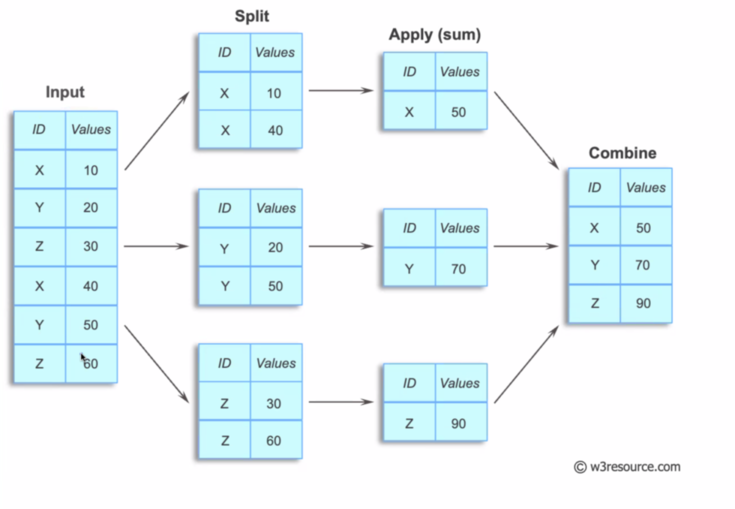

In [48]:
# 파악할 데이터: 수치형 데이터 

data = pd.DataFrame({
    '도시': ['서울', '부산', '제주', '서울', '제주', '제주', '부산', '부산', '제주'],
    '연도': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    '전입신고 수': [10040, 22300, 6000, 12400, 4000, 600, 11100, 45000, 31000],
    '세금': [1004000, 2230000, 600000, 1240000, 400000, 60000, 1110000, 4500000, 3100000]
})
data

,도시,연도,전입신고 수,세금
0,서울,2015,10040,1004000
1,부산,2016,22300,2230000
2,제주,2017,6000,600000
3,서울,2018,12400,1240000
4,제주,2019,4000,400000
5,제주,2020,600,60000
6,부산,2021,11100,1110000
7,부산,2022,45000,4500000
8,제주,2023,31000,3100000


In [50]:
# 도시별 전입신고 수의 합 
data.groupby('도시')['전입신고 수'].sum()

도시
부산    78400
서울    22440
제주    41600
Name: 전입신고 수, dtype: int64

In [49]:
# 도시별 전입신고 수의 평균 
data.groupby('도시')['전입신고 수'].mean()

도시
부산    26133.333333
서울    11220.000000
제주    10400.000000
Name: 전입신고 수, dtype: float64

In [51]:
# 도시, 연도별 평균 
data.groupby(['도시','연도']).mean()

전입신고 수         세금
도시 연도                      
부산 2016  22300.0  2230000.0
   2021  11100.0  1110000.0
   2022  45000.0  4500000.0
서울 2015  10040.0  1004000.0
   2018  12400.0  1240000.0
제주 2017   6000.0   600000.0
   2019   4000.0   400000.0
   2020    600.0    60000.0
   2023  31000.0  3100000.0

In [53]:
# 도시, 연도별 세금 합
data.groupby(['도시', '연도'])['세금'].sum()

### 데이터 프레임 병합 

- pd.concat()
- pd.merge()

In [54]:
data1 = pd.DataFrame({
    '도시': ['서울', '부산', '제주', '서울'],
    '연도': [2015, 2016, 2017, 2018],
    '전입신고 수': [10040, 22300, 6000, 12400],
    '세금': [1004000, 2230000, 600000, 1240000]
}, index = ['a', 'b', 'c', 'd'])

data2 = pd.DataFrame({
    '도시': ['서울', '부산', '제주', '서울'],
    '연도': [2015, 2015, 2011, 2020],
    '전입신고 수': [10040, 22300, 6000, 12400],
    '세금': [1004000, 2230000, 600000, 1240000]
}, index = ['e', 'f', 'g', 'h'])


,도시,연도,전입신고 수,세금
e,서울,2015,10040,1004000
f,부산,2015,22300,2230000
g,제주,2011,6000,600000
h,서울,2020,12400,1240000


In [55]:
print(data1)
print(data2)

   도시    연도  전입신고 수       세금
a  서울  2015   10040  1004000
b  부산  2016   22300  2230000
c  제주  2017    6000   600000
d  서울  2018   12400  1240000
   도시    연도  전입신고 수       세금
e  서울  2015   10040  1004000
f  부산  2015   22300  2230000
g  제주  2011    6000   600000
h  서울  2020   12400  1240000


In [58]:
# pd.concat([df1, df2])
add_data = pd.concat([data1, data2]) # default는 axis = 0 행방향.
add_data 

,도시,연도,전입신고 수,세금
a,서울,2015,10040,1004000
b,부산,2016,22300,2230000
c,제주,2017,6000,600000
d,서울,2018,12400,1240000
e,서울,2015,10040,1004000
f,부산,2015,22300,2230000
g,제주,2011,6000,600000
h,서울,2020,12400,1240000


In [59]:
# pd.concat([df1, df2]) + ignore_index = True
# 인덱스의 충돌을 방지하고자 인덱스를 재 배열한다. 
# 지정된 인덱스가 겹치지 않는다면 합치고 재배열한다. 

add_data = pd.concat([data1, data2], ignore_index = True)
add_data

,도시,연도,전입신고 수,세금
0,서울,2015,10040,1004000
1,부산,2016,22300,2230000
2,제주,2017,6000,600000
3,서울,2018,12400,1240000
4,서울,2015,10040,1004000
5,부산,2015,22300,2230000
6,제주,2011,6000,600000
7,서울,2020,12400,1240000


In [61]:
data1 = pd.DataFrame({
    '도시': ['서울', '부산', '제주', '서울'],
    '연도': [2015, 2016, 2017, 2018],
    '전입신고 수': [10040, 22300, 6000, 12400],
    '세금': [1004000, 2230000, 600000, 1240000]
})

data2 = pd.DataFrame({
    '도시': ['서울', '부산', '제주', '서울'],
    '연도': [2015, 2015, 2011, 2020],
    '전입신고 수': [10040, 22300, 6000, 12400],
    '세금': [1004000, 2230000, 600000, 1240000]
})

In [62]:
# pd.concat([df1, df2]) + ignore_index = True
# 따로 인덱스를 지정하지 않았다면 합치고 인덱스를 재 지정해준다. 

add_data = pd.concat([data1, data2], ignore_index = True)

add_data

,도시,연도,전입신고 수,세금
0,서울,2015,10040,1004000
1,부산,2016,22300,2230000
2,제주,2017,6000,600000
3,서울,2018,12400,1240000
4,서울,2015,10040,1004000
5,부산,2015,22300,2230000
6,제주,2011,6000,600000
7,서울,2020,12400,1240000


### Join 

- inner
- outer
- left
- right

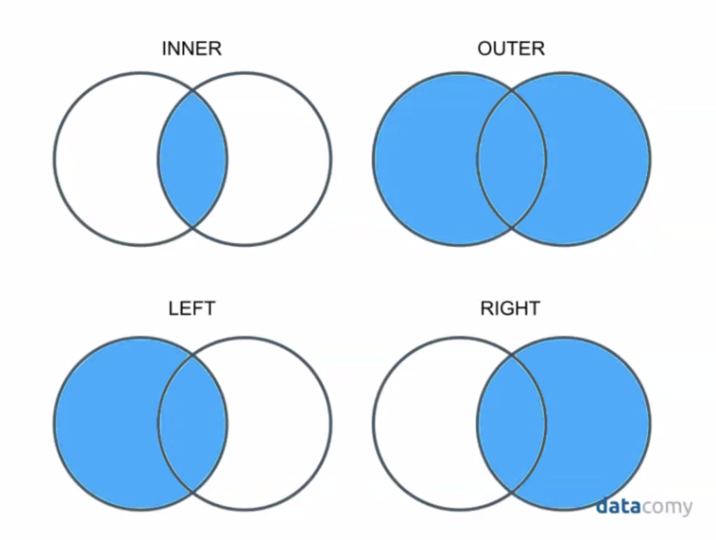

In [63]:
df1 = pd.DataFrame([['A0', 'A1', 'A2', 'A3'],
                     ['B0', 'B1', 'B2', 'B3'],
                     ['C0', 'C1', 'C2', 'C3'],
                     ['D0', 'D1', 'D2', 'D3']], columns=list('ABCD'))
 
df2 = pd.DataFrame([['A4', 'A5', 'A6', 'A7'],
                     ['B4', 'B5', 'B6', 'B7'],
                     ['C4', 'C5', 'C6', 'C7'],
                     ['D4', 'D5', 'D6', 'D7']], columns=['A', 'B', 'C', 'D'], index=[4, 5, 6, 7])

df3 = pd.DataFrame([['A8', 'A9', 'A10', 'A11'],
                     ['B8', 'B9', 'B10', 'B11'],
                     ['C8', 'C9', 'C10', 'C11'],
                     ['D8', 'D9', 'D10', 'D11']], columns=list('ABCD'), index=[8, 9, 10, 11])

print(df1)
print(df2)
print(df3)

    A   B   C   D
0  A0  A1  A2  A3
1  B0  B1  B2  B3
2  C0  C1  C2  C3
3  D0  D1  D2  D3
    A   B   C   D
4  A4  A5  A6  A7
5  B4  B5  B6  B7
6  C4  C5  C6  C7
7  D4  D5  D6  D7
     A   B    C    D
8   A8  A9  A10  A11
9   B8  B9  B10  B11
10  C8  C9  C10  C11
11  D8  D9  D10  D11


In [66]:
pd.concat([df1, df2, df3], axis = 1) # 열방향으로 지정했을 때, default: outer join 
# == pd.concat([df1, df2, df3], axis=1, join='outer')

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,A1,A2,A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B0,B1,B2,B3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0,C1,C2,C3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D0,D1,D2,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,A5,A6,A7,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,B4,B5,B6,B7,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,C4,C5,C6,C7,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,D4,D5,D6,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,A9,A10,A11
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B8,B9,B10,B11


In [67]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                  'F': ['F2', 'F3', 'F6', 'F7']}, index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [69]:
# join = outer
pd.concat([df1, df4], axis=1, join = 'outer') # == pd.concat([df1, df2], axis = 1)

,A,B,C,D,B,D,F
0,A0,A1,A2,A3,NaN,NaN,NaN
1,B0,B1,B2,B3,NaN,NaN,NaN
2,C0,C1,C2,C3,B2,D2,F2
3,D0,D1,D2,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [71]:
# join = inner
pd.concat([df1, df4], axis=1, join='inner')

,A,B,C,D,B,D,F
2,C0,C1,C2,C3,B2,D2,F2
3,D0,D1,D2,D3,B3,D3,F3


In [72]:
# right join 
pd.concat([df1, df4], axis = 1).reindex(df4.index)

,A,B,C,D,B,D,F
2,C0,C1,C2,C3,B2,D2,F2
3,D0,D1,D2,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [73]:
# left join
pd.concat([df1, df4], axis=1).reindex(df1.index)

,A,B,C,D,B,D,F
0,A0,A1,A2,A3,NaN,NaN,NaN
1,B0,B1,B2,B3,NaN,NaN,NaN
2,C0,C1,C2,C3,B2,D2,F2
3,D0,D1,D2,D3,B3,D3,F3


In [74]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                  'A': ['A0', 'A4', 'A2', 'A3'],
            'B': ['B0', 'B4', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                  'C': ['C0', 'C1', 'C2', 'C3'],
                  'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)

  key   A   B
0  K0  A0  B0
1  K4  A4  B4
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [77]:
# pd.merge()

mi = pd.merge(left, right) # default inner
print(mi)

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K2  A2  B2  C2  D2
2  K3  A3  B3  C3  D3


In [76]:
pd.merge(left, right, how='outer')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A4,B4,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [78]:
m_key = pd.merge(left, right, on = 'key')
print(m_key)

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K2  A2  B2  C2  D2
2  K3  A3  B3  C3  D3


In [80]:
m_l = pd.merge(left, right, on = 'key', how = 'left')
m_l

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A4,B4,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [81]:
m_r = pd.merge(left, right, on = 'key', how = 'right')
m_r

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
